<a href="https://colab.research.google.com/github/wesley0521/kaggle/blob/main/Kaggle_Medical_Cost_Predict_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
Dataset = pd.read_csv("insurance.csv")
# 看前五筆資料
Dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [110]:
# 檢查欄位是否有 NaN
for index,col in enumerate(Dataset.columns):
  print(f"第{index+1}個欄位 {col} 的缺失值共有 {Dataset[col].isnull().sum()}筆")

第1個欄位 age 的缺失值共有 0筆
第2個欄位 sex 的缺失值共有 0筆
第3個欄位 bmi 的缺失值共有 0筆
第4個欄位 children 的缺失值共有 0筆
第5個欄位 smoker 的缺失值共有 0筆
第6個欄位 region 的缺失值共有 0筆
第7個欄位 charges 的缺失值共有 0筆


In [111]:
# 引入這部份會用到的套件
import matplotlib.pyplot as plt
import seaborn as sns

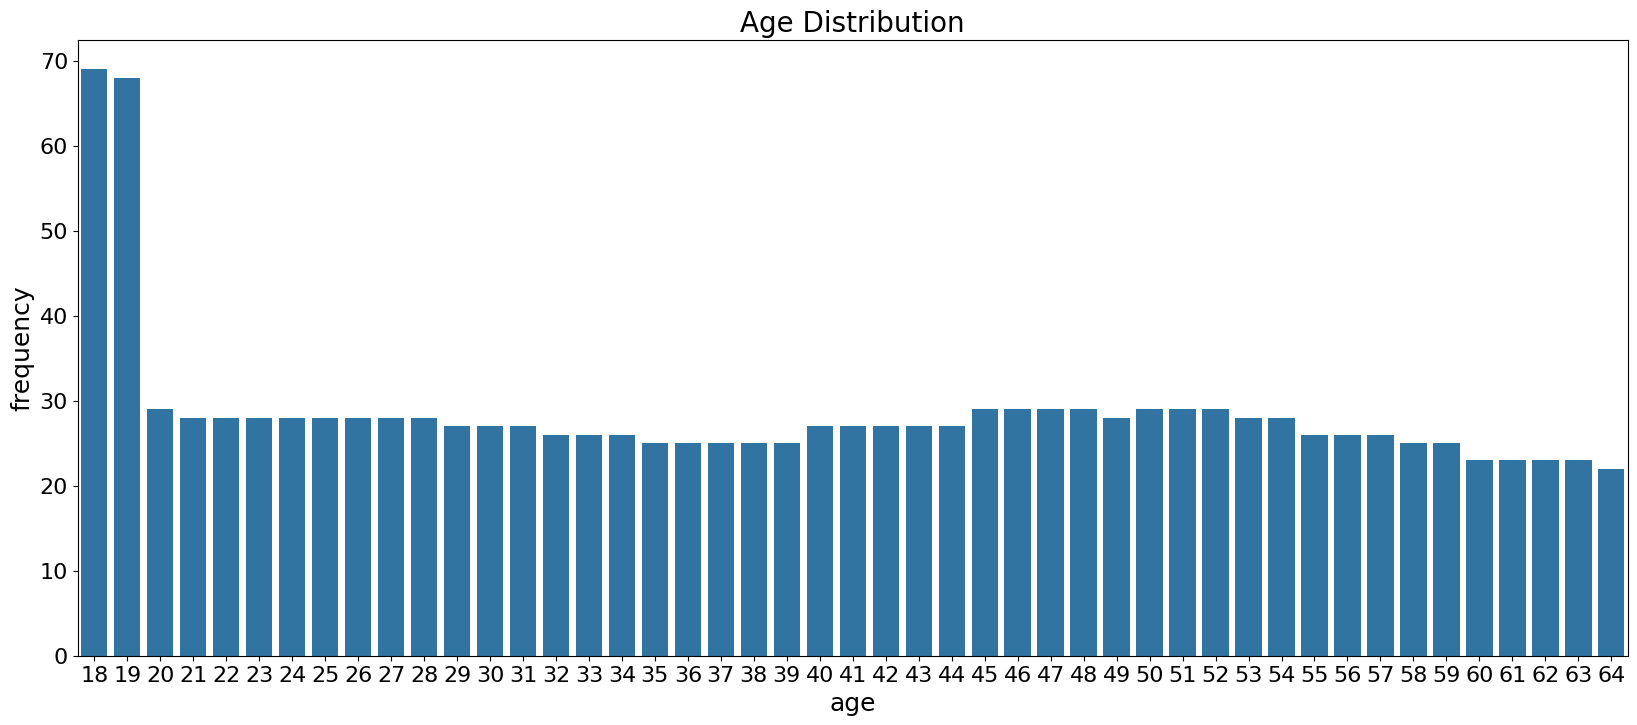

In [112]:
plt.figure(figsize=(20,8))
plt.title("Age Distribution", fontsize=20)
plt.xlabel("age", fontsize=18)
plt.ylabel("frequency", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
age = sns.countplot(x="age", data=Dataset)

sex
1    676
0    662
Name: count, dtype: int64


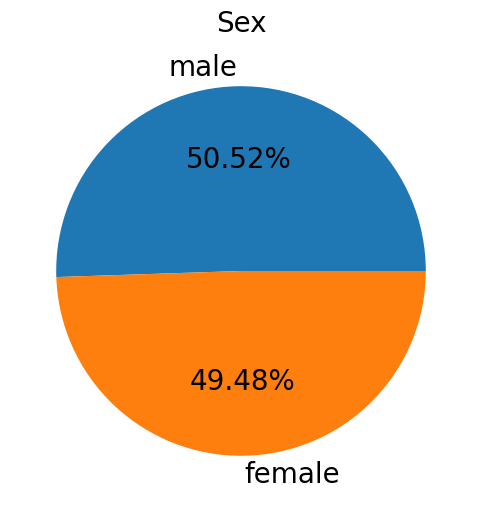

In [131]:
print(Dataset["sex"].value_counts())
# male = Dataset[Dataset["sex"] == "male"]
# female = Dataset[Dataset["sex"] == "female"]
# male_percent = len(male) / len(Dataset)
# female_percent = len(female) / len(Dataset)
# print(f"male: {male_percent}")
# print(f"female: {female_percent}")
plt.figure(figsize=(8,6))
plt.title("Sex", fontsize=20)
plt.rcParams['font.size'] =20
plt.pie(Dataset["sex"].value_counts(), labels=["male", "female"] ,autopct="%.2f%%")
plt.show()

(array([ 13.,  17.,  47.,  80., 103., 131., 162., 157., 145., 143., 105.,
         90.,  54.,  42.,  20.,  12.,  10.,   4.,   1.,   2.]),
 array([15.96  , 17.8185, 19.677 , 21.5355, 23.394 , 25.2525, 27.111 ,
        28.9695, 30.828 , 32.6865, 34.545 , 36.4035, 38.262 , 40.1205,
        41.979 , 43.8375, 45.696 , 47.5545, 49.413 , 51.2715, 53.13  ]),
 <BarContainer object of 20 artists>)

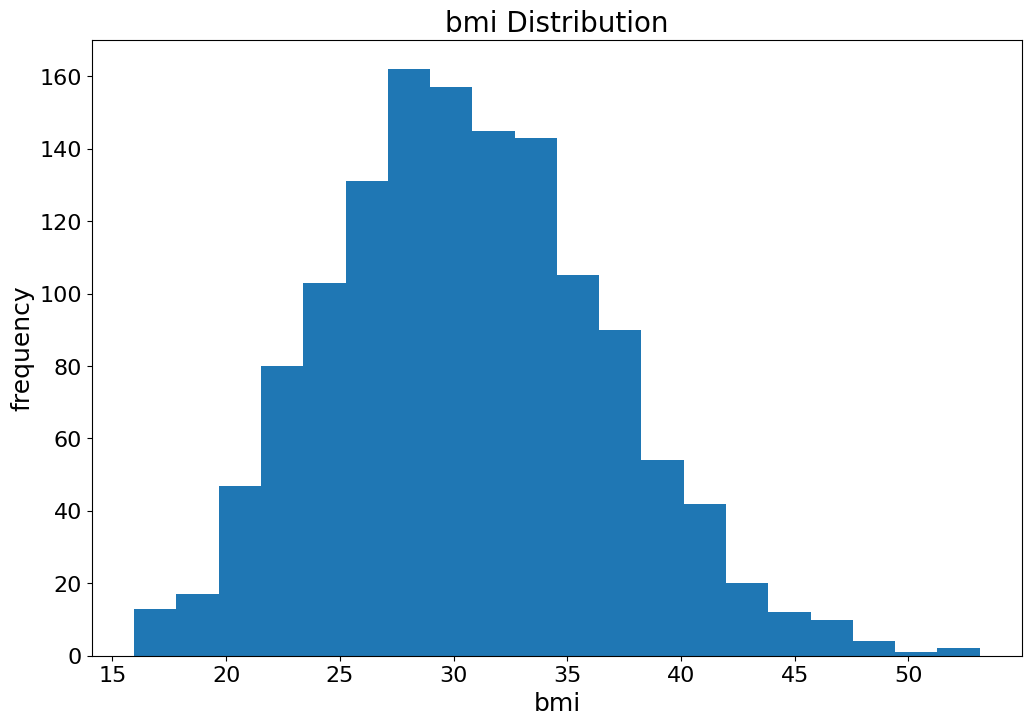

In [114]:
plt.figure(figsize=(12,8))
plt.title("bmi Distribution", fontsize=20)
plt.xlabel("bmi", fontsize=18)
plt.ylabel("frequency", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.hist(Dataset["bmi"], bins=20)

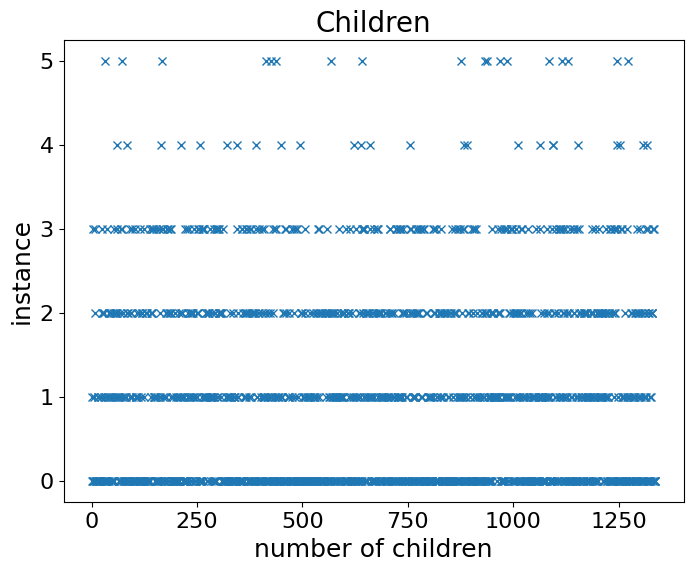

In [115]:
plt.figure(figsize=(8,6))
plt.plot(Dataset["children"], "x")
plt.title("Children", fontsize=20)
plt.xlabel("number of children", fontsize=18)
plt.ylabel("instance", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

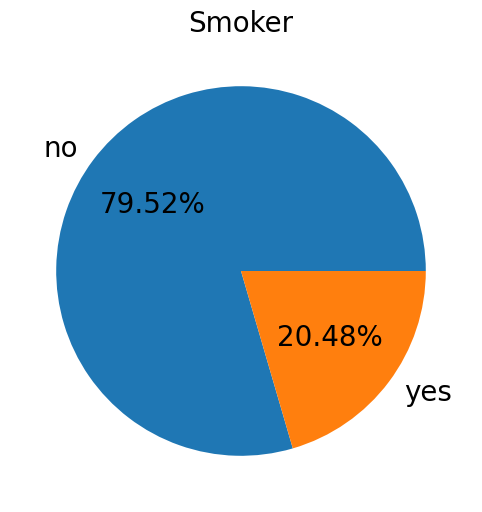

In [132]:
# smoke_yes = len(Dataset[Dataset["smoker"] == "yes"])
# smoke_no = len(Dataset[Dataset["smoker"] == "no"])
# yes = smoke_yes / (smoke_yes + smoke_no)
# no = smoke_no / (smoke_yes + smoke_no)
# print(f"yes: {yes}")
# print(f"no: {no}")
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] =20
plt.title("Smoker", fontsize=20)
plt.pie(Dataset["smoker"].value_counts(), labels=["no", "yes"], autopct="%.2f%%")
plt.show()

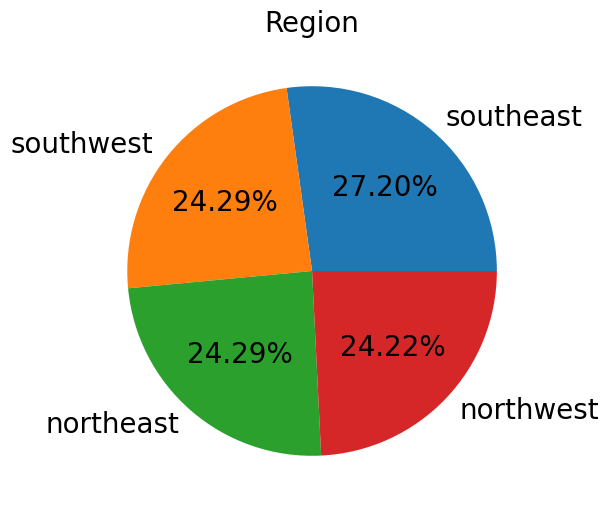

In [133]:
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] =20
plt.title("Region", fontsize=20)
plt.pie(Dataset["region"].value_counts(), labels=["southeast", "southwest", "northeast", "northwest"], autopct="%.2f%%")
plt.show()

(array([287., 249., 205., 193.,  71.,  58.,  46.,  40.,  25.,  10.,  25.,
         34.,  30.,  27.,  22.,  10.,   1.,   1.,   2.,   2.]),
 array([ 1121.8739   ,  4254.3016055,  7386.729311 , 10519.1570165,
        13651.584722 , 16784.0124275, 19916.440133 , 23048.8678385,
        26181.295544 , 29313.7232495, 32446.150955 , 35578.5786605,
        38711.006366 , 41843.4340715, 44975.861777 , 48108.2894825,
        51240.717188 , 54373.1448935, 57505.572599 , 60638.0003045,
        63770.42801  ]),
 <BarContainer object of 20 artists>)

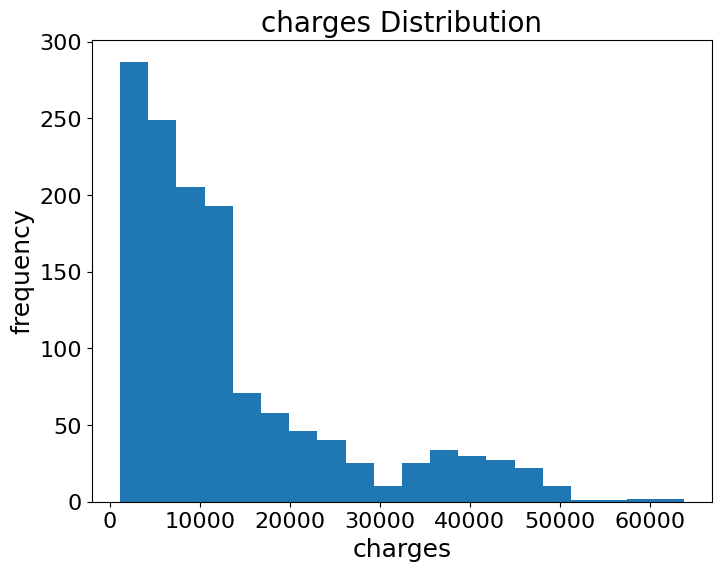

In [118]:
plt.figure(figsize=(8,6))
plt.title("charges Distribution", fontsize=20)
plt.xlabel("charges", fontsize=18)
plt.ylabel("frequency", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.hist(Dataset["charges"],bins=20)

In [119]:
#分類數值型或是類別型資料
numerical_attributes = []
categorical_attributes = []

for col in Dataset.columns:

  col_type = Dataset[col].dtype
  print(col_type)
  # 如果 col_type 是 int64 或是 float64，則 添加到數值型
  if col_type=="int64" or col_type=="float64":
    numerical_attributes.append(col)
  # 如果 col_type 是 object，則 添加到類別型
  elif col_type == "object":
    categorical_attributes.append(col)

# 待會要針對 X 做 特徵縮放，所以先把 Y 拿掉
numerical_attributes.remove("charges")

print(f"數值型的欄位有:{numerical_attributes}")
print(f"類別型的欄位有{categorical_attributes}")

int64
object
float64
int64
object
object
float64
數值型的欄位有:['age', 'bmi', 'children']
類別型的欄位有['sex', 'smoker', 'region']


In [120]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Dataset["sex"] = label_encoder.fit_transform(Dataset["sex"])
Dataset["smoker"] = label_encoder.fit_transform(Dataset["smoker"])
Dataset["region"] = label_encoder.fit_transform(Dataset["region"])
Dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [102]:

# One_Hot_Dataset = pd.get_dummies(Dataset)

# # 觀察 One-Hot Encoding 後的前五筆資料
# One_Hot_Dataset.head()

In [121]:
# 引入這部份會用到的套件
from sklearn.model_selection import train_test_split

# 區分 X 與 Y
Y = Dataset["charges"]
X = Dataset.drop(["charges"], axis=1)

# 進行資料切分
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print(f"訓練資料集(X) {X_train.shape}")
print(f"訓練資料集(Y) {Y_train.shape}")
print(f"驗證資料集(X) {X_test.shape}")
print(f"驗證資料集(Y) {Y_test.shape}")

訓練資料集(X) (1070, 6)
訓練資料集(Y) (1070,)
驗證資料集(X) (268, 6)
驗證資料集(Y) (268,)


In [123]:

# 引入這部份會使用到的套件
from sklearn.preprocessing import StandardScaler

# 取出 訓練與驗證資料集的 數值型資料，使用 numerical_attributes
X_train_numerical = X_train[numerical_attributes]
X_test_numerical = X_test[numerical_attributes]

# 實例化，然後使用 訓練資料集 fit (同時針對 X 與 Y)
x_scaler = StandardScaler().fit(X_train_numerical)
y_scaler = StandardScaler().fit(Y_train.to_numpy().reshape(-1, 1))
# 使用 scaler 對 訓練資料集 與 驗證資料集 transform (同時針對 X 與 Y)
X_train_numerical_trans = x_scaler.transform(X_train_numerical)
X_test_numerical_trans = x_scaler.transform(X_test_numerical)

Y_train_trans = y_scaler.transform(Y_train.to_numpy().reshape(-1, 1))
Y_test_trans = y_scaler.transform(Y_test.to_numpy().reshape(-1, 1))

# 對欄位進行覆寫 （針對 X）
X_train[numerical_attributes] = X_train_numerical_trans
X_test[numerical_attributes] = X_test_numerical_trans

In [124]:
# 引入這部份會使用到的套件，可以使用任何的回歸模型，在此預設為 SVR
from sklearn.svm import SVR

SVR_Algorithm = SVR(kernel="rbf", C=100, gamma=0.01)

# 訓練模型
SVR_Model = SVR_Algorithm.fit(X_train, Y_train_trans.reshape(-1))

In [128]:
# fit 使用 X_train 與 Y_train_trans
# predict 使用 X_test 與 Y_test_trans
# 預測
SVR_Predictions = SVR_Model.predict(X_test)

# 對 SVR_Predictions 與 Y_test 做 Inverse Transform，需要用上 y_scaler
SVR_Predictions_inv = y_scaler.inverse_transform(SVR_Predictions.reshape(-1,1))
Y_test_inv = y_scaler.inverse_transform(Y_test_trans.reshape(-1,1))

# 統計平均誤差，與列印出前50筆預測值與答案
Total_Error = 0
counter = 0

for pred, ans in zip(SVR_Predictions_inv.reshape(-1), Y_test.to_numpy().reshape(-1)):
  if counter < 75:
    print(f"第 {counter} 筆預測結果:{round(pred)} vs. 實際答案:{round(ans)}")
  Total_Error = Total_Error + abs(pred-ans)
  counter = counter + 1

print(f"\n平均誤差值:{round(Total_Error/len(SVR_Predictions))}")

第 0 筆預測結果:10491 vs. 實際答案:30285
第 1 筆預測結果:2628 vs. 實際答案:2046
第 2 筆預測結果:35080 vs. 實際答案:38415
第 3 筆預測結果:5590 vs. 實際答案:4878
第 4 筆預測結果:9775 vs. 實際答案:8551
第 5 筆預測結果:31199 vs. 實際答案:36189
第 6 筆預測結果:10210 vs. 實際答案:9048
第 7 筆預測結果:14460 vs. 實際答案:14256
第 8 筆預測結果:34597 vs. 實際答案:39728
第 9 筆預測結果:13228 vs. 實際答案:11987
第 10 筆預測結果:5461 vs. 實際答案:4351
第 11 筆預測結果:13590 vs. 實際答案:12558
第 12 筆預測結果:29402 vs. 實際答案:34303
第 13 筆預測結果:13892 vs. 實際答案:12926
第 14 筆預測結果:8652 vs. 實際答案:7624
第 15 筆預測結果:5587 vs. 實際答案:4402
第 16 筆預測結果:30573 vs. 實際答案:34672
第 17 筆預測結果:25679 vs. 實際答案:17353
第 18 筆預測結果:7374 vs. 實際答案:6548
第 19 筆預測結果:4249 vs. 實際答案:3501
第 20 筆預測結果:12572 vs. 實際答案:11488
第 21 筆預測結果:5859 vs. 實際答案:4618
第 22 筆預測結果:9610 vs. 實際答案:8516
第 23 筆預測結果:8965 vs. 實際答案:8028
第 24 筆預測結果:8800 vs. 實際答案:7790
第 25 筆預測結果:15155 vs. 實際答案:14319
第 26 筆預測結果:7945 vs. 實際答案:6849
第 27 筆預測結果:3519 vs. 實際答案:2405
第 28 筆預測結果:28046 vs. 實際答案:25382
第 29 筆預測結果:3053 vs. 實際答案:1917
第 30 筆預測結果:2668 vs. 實際答案:1708
第 31 筆預測結果:14451 vs. 實際答案:13224
第 32 筆預測結果:7511 vs.

In [126]:
def test_SVR_parameter(kernel, C, gamma):
  # 實例化演算法
  SVR_Algorithm = SVR(kernel=kernel, C=C, gamma=gamma)

  # 訓練模型
  SVR_Model = SVR_Algorithm.fit(X_train, Y_train_trans.reshape(-1))

  # 評估模型
  # 使用訓練的回歸模型進行預測
  SVR_Predictions = SVR_Model.predict(X_test)

  # 做 inverse transform
  SVR_Predictions_inv = y_scaler.inverse_transform(SVR_Predictions.reshape(-1,1))
  Y_test_inv = y_scaler.inverse_transform(Y_test_trans.reshape(-1,1))

  # 統計誤差
  Total_Error = 0
  for pred, ans in zip(SVR_Predictions_inv.reshape(-1), Y_test_inv.reshape(-1)):
    Total_Error = Total_Error + (abs(pred-ans))

  print(f"\n[C={C}, Gamma={gamma}]平均誤差值是 {round(Total_Error/len(SVR_Predictions))}")

In [127]:
kernel = "rbf"
C_list = [0.01, 0.1, 1, 10, 100]
Gamma_list = [0.01, 0.1, 1, 10, 100]
for C in C_list:
  for gamma in Gamma_list:
    test_SVR_parameter(kernel=kernel, C=C, gamma=gamma)


[C=0.01, Gamma=0.01]平均誤差值是 7840

[C=0.01, Gamma=0.1]平均誤差值是 6503

[C=0.01, Gamma=1]平均誤差值是 7721

[C=0.01, Gamma=10]平均誤差值是 8518

[C=0.01, Gamma=100]平均誤差值是 8578

[C=0.1, Gamma=0.01]平均誤差值是 5813

[C=0.1, Gamma=0.1]平均誤差值是 3939

[C=0.1, Gamma=1]平均誤差值是 5429

[C=0.1, Gamma=10]平均誤差值是 8045

[C=0.1, Gamma=100]平均誤差值是 8516

[C=1, Gamma=0.01]平均誤差值是 3608

[C=1, Gamma=0.1]平均誤差值是 2782

[C=1, Gamma=1]平均誤差值是 3452

[C=1, Gamma=10]平均誤差值是 7431

[C=1, Gamma=100]平均誤差值是 8612

[C=10, Gamma=0.01]平均誤差值是 2731

[C=10, Gamma=0.1]平均誤差值是 2676

[C=10, Gamma=1]平均誤差值是 4252

[C=10, Gamma=10]平均誤差值是 7622

[C=10, Gamma=100]平均誤差值是 9211

[C=100, Gamma=0.01]平均誤差值是 2628

[C=100, Gamma=0.1]平均誤差值是 2650

[C=100, Gamma=1]平均誤差值是 5958

[C=100, Gamma=10]平均誤差值是 7672

[C=100, Gamma=100]平均誤差值是 9211
